![lop](../../images/logo_diive1_128px.png)

<span style='background:#FFF8E1; font-size:24px; display:block; border-left:40px solid #FFECB3; padding-left:40px;'>
<b>
    Format EddyPro _fluxnet_ output files for upload to FLUXNET database
</b>
</span>

---
**Notebook version**: `2` (23 Aug 2023)  
Example notebook for class `FormatEddyProFluxnetFileForUpload` in `diive.pkgs.formats.fluxnet` of the time series processing library `diive`.  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  


</br>

---

# **Background**

- Eddypro outputs `_fluxnet_` files
- The files cannot be directly uploaded to the FLUXNET database
- The class `FormatEddyProFluxnetFileForUpload` helps in formatting the files to comply with FLUXNET requirements for data sharing

More info:
- [FLUXNET Requirements for Data Sharing](https://www.swissfluxnet.ethz.ch/index.php/knowledge-base/fluxnet-requirements/)
- [Data submission - General Information](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/general-information)
- [FLUXNET Variables codes](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/variables-codes)

</br>

---

# **Setup**

## User settings

In [1]:
SOURCE = r"F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files"  # This is the folder where datafiles are searched
OUTDIR = r"F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload"  # Output yearly CSV to this folder

## Imports

In [2]:
import pkg_resources
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from diive.pkgs.formats.fluxnet import FormatEddyProFluxnetFileForUpload  # Class to format output files for upload
from diive.core.plotting.heatmap_datetime import HeatmapDateTime  # For plotting heatmaps
from diive.core.plotting.timeseries import TimeSeries  # For simple (interactive) time series plotting

dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"This page was last modified on: {dt_string}")
version_diive = pkg_resources.get_distribution("diive").version
print(f"diive version: v{version_diive}")

Loading BokehJS ...

C:\Users\holukas\AppData\Local\pypoetry\Cache\virtualenvs\diive-HxUoW9nG-py3.9\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


This page was last modified on: 2023-08-23 18:47:34
diive version: v0.57.0


### Show docstring

In [3]:
print(FormatEddyProFluxnetFileForUpload.__name__)
print(FormatEddyProFluxnetFileForUpload.__doc__)

FormatEddyProFluxnetFileForUpload

    Helper class to convert EddyPro _fluxnet_ output files to the file
    format required for data upload (data sharing) to FLUXNET

    The class does the following:
    - Search source folder for _fluxnet_ files
    - Load data from all found files and store in dataframe
    - Make subset that contains required variables
    - Set missing values to FLUXNET format (-9999)
    - Rename variables by adding the FLUXNET suffix (_1_1_1)
    - Insert two timestamp columns denoting START and END of averaging interval
    - Format the two timestamp columns to FLUXNET format YYYYMMDDhhmm
    - Save data from dataframe to yearly files

    - Example notebook available in:
        notebooks/Formats/ConvertEddyProFluxnetFileForUpload.ipynb

    Variables shared with FLUXNET:

        CO2:
        - FC (µmolCO2 m-2 s-1): Carbon Dioxide (CO2) turbulent flux (without storage component)
        - FC_SSITC_TEST (adimensional): Quality check - CO2 flux - * see the no

</br>

</br>

---

# **Format data**

## Initialize

In [4]:
fxn = FormatEddyProFluxnetFileForUpload(
    site='CH-FRU',
    sourcedir=SOURCE,
    outdir=OUTDIR,    
    add_runid=True)


Initiated formatting for datafiles with the following settings:
    site: CH-FRU
    source folder: F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files
    output folder: F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload
    add run ID: True


</br>

## Search and merge `_fluxnet_` datafiles

In [5]:
fxn.mergefiles(limit_n_files=2)


Searching for EDDYPRO_FLUXNET_30MIN files with extension .csv andID _fluxnet_ in folder F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files ...
    Found 18 files:
   --> F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2005_eddypro_CH-FRU_FR-20230430-150230_fluxnet_2023-04-30T205349_adv.csv
   --> F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2006_eddypro_CH-FRU_FR-20230429-014233_fluxnet_2023-04-29T152920_adv.csv
   --> F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2007_eddypro_CH-FRU_FR-20230429-013855_fluxnet_2023-04-29T140625_adv.csv
   --> F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2008_eddypro_CH-FRU_FR-20230429-013552_fluxnet_2023-04-29T154708_adv.csv
   --> F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2009_eddypro_CH-FRU_FR-20230428-010024_fluxnet_2023-04-28T143645_adv.csv
   --> F:\Sync\luhk

In [6]:
fxn.merged_df

AIR_MV  AIR_DENSITY  AIR_RHO_CP   AIR_CP  AOA_METHOD  AXES_ROTATION_METHOD      BOWEN  BURBA_METHOD  BADM_LOCATION_LAT  BADM_LOCATION_LONG  BADM_LOCATION_ELEV  BADM_HEIGHTC  BADM_INST_SAMPLING_INT  BADM_INST_AVERAGING_INT  BADM_INST_MODEL_SA  ...  W_T_SONIC_COV_IBROM_N0004  W_NUM_SPIKES  WD_FILTER_NREX  W_SPIKE_NREX  W_ABSLIM_NREX  W_VM97_TEST  W_LGD     W_KID    W_ZCD  W_ITC  W_ITC_TEST  WBOOST_APPLIED  WPL_APPLIED          ZL   ZL_UNCORR
TIMESTAMP_MIDDLE                                                                                                                                                                                                                                                          ...                                                                                                                                                                                                     
2005-07-05 08:45:00  0.026419      1.09553     1109.30  1012.57         0.0                   1.0   3.181800           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000632           0.0             0.0           0.0            0.0  801000011.0    0.0  10.67790  29714.0   74.0         4.0             0.0          1.0 -398.107000 -467.712000
2005-07-05 09:15:00  0.026355      1.09823     1111.84  1012.39         0.0                   1.0   2.737860           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000022           0.0             0.0           0.0            0.0  801000011.0    0.0   7.07312  26444.0   53.0         4.0             0.0          1.0  -19.829600  -23.150400
2005-07-05 09:45:00  0.026315      1.09993     1113.37  1012.22         0.0                   1.0 -12.164200           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000971           0.0             0.0           0.0            0.0  801000011.0    0.0   6.84782  25600.0   74.0         4.0             0.0          1.0 -158.833000 -182.128000
2005-07-05 10:15:00  0.026312      1.10003     1113.35  1012.11         0.0                   1.0  -1.274180           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000036           0.0             0.0           0.0            0.0  801000011.0    0.0   5.47279  22879.0   39.0         3.0             0.0          1.0   -5.895470   -6.398840
2005-07-05 10:45:00  0.026382      1.09714     1110.40  1012.09         0.0                   1.0   2.368330           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000141           0.0             0.0           0.0            0.0  801000011.0    0.0   8.05622  26767.0   15.0         1.0             0.0          1.0    8.726640    8.590340
...                       ...          ...         ...      ...         ...                   ...        ...           ...                ...                 ...                 ...           ...                     ...                      ...                 ...  ...                        ...           ...             ...           ...            ...          ...    ...       ...      ...    ...         ...             ...          ...         ...         ...
2007-01-01 02:45:00  0.025822      1.11794     1129.19  1010.06         0.0                   1.0   0.165085           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                  

</br>

## Test for signal strength / AGC

<div class="alert alert-block alert-danger">
    <b>Do not use for H (sensible heat flux).</b> This test is only relevant for fluxes where the concentration was measured by a gas analyzer, e.g. FC, FH2O, LE, ET, N2O, CH4, etc ... 
</div>

In [7]:
FLUXCOLS = ['FC', 'LE']  # Give flux columns as list
SIGNAL_STRENGTH_COL = 'CUSTOM_AGC_MEAN'  # Name of the column storing the signal strength, typically 'CUSTOM_AGC_MEAN' for LI-7500, 'CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN' for LI-7200, or something similar
SIGNAL_STRENGTH_THRESHOLD = 90  # Signal strength threshold, flux values where threshold is exceeded are flagged as rejected
SIGNAL_STRENGTH_METHOD = 'discard above'  # 'discard above' flags fluxes where signal strength > threshold, 'discard below' where signal strength < threshold

In [8]:
TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot_interactive()



Removing FC flux values where signal strength / AGC is not sufficient:

Performing quality checks ...

Detected base variable CO2 for FC.
Generating new flag variable FLAG_L2_FC_MISSING_TEST, newly calculated from output variable FC,with flag 0 (good values) where FC is available, flag 2 (bad values) where FC is missing ...
Generating new flag variable FLAG_L2_FC_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (good values) where CUSTOM_AGC_MEAN <= 90, flag 2 (bad values) where CUSTOM_AGC_MEAN > 90 ...
++Adding new column FLAG_L2_FC_MISSING_TEST (Level-2 quality flag) to main data ...
++Adding new column FLAG_L2_FC_SIGNAL_STRENGTH_TEST (Level-2 quality flag) to main data ...

Generating overall quality flag QCF ...


QCF FLAG EVOLUTION
This output shows the evolution of the QCF overall quality flag
when test flags are applied sequentially to the variable FC.

Number of FC records before QC: 23433
+++ FLAG_L2_FC_MISSING_TEST rejected 0 values (

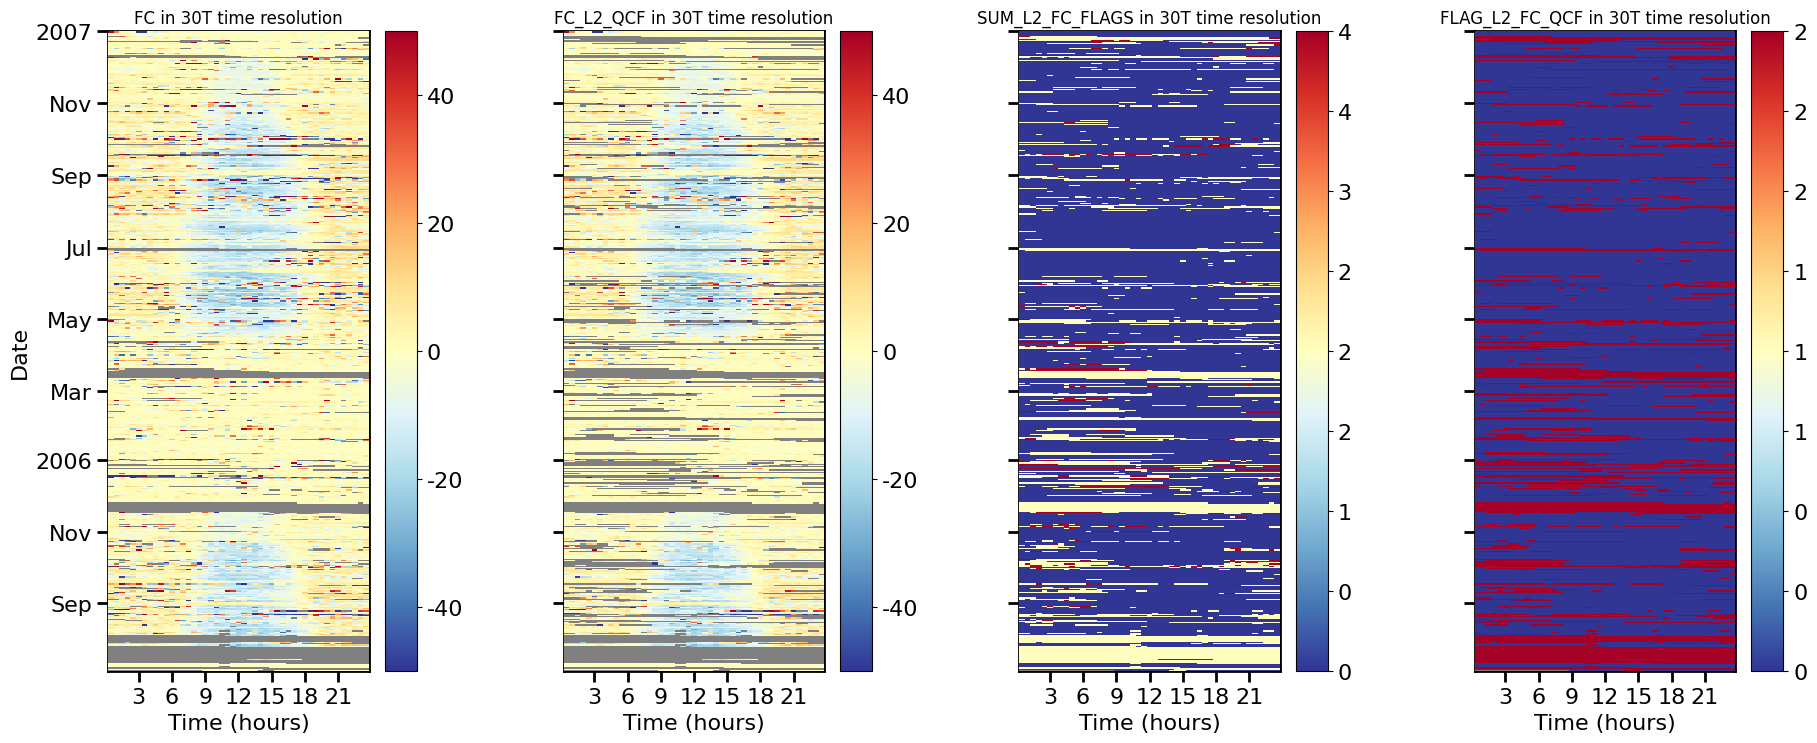

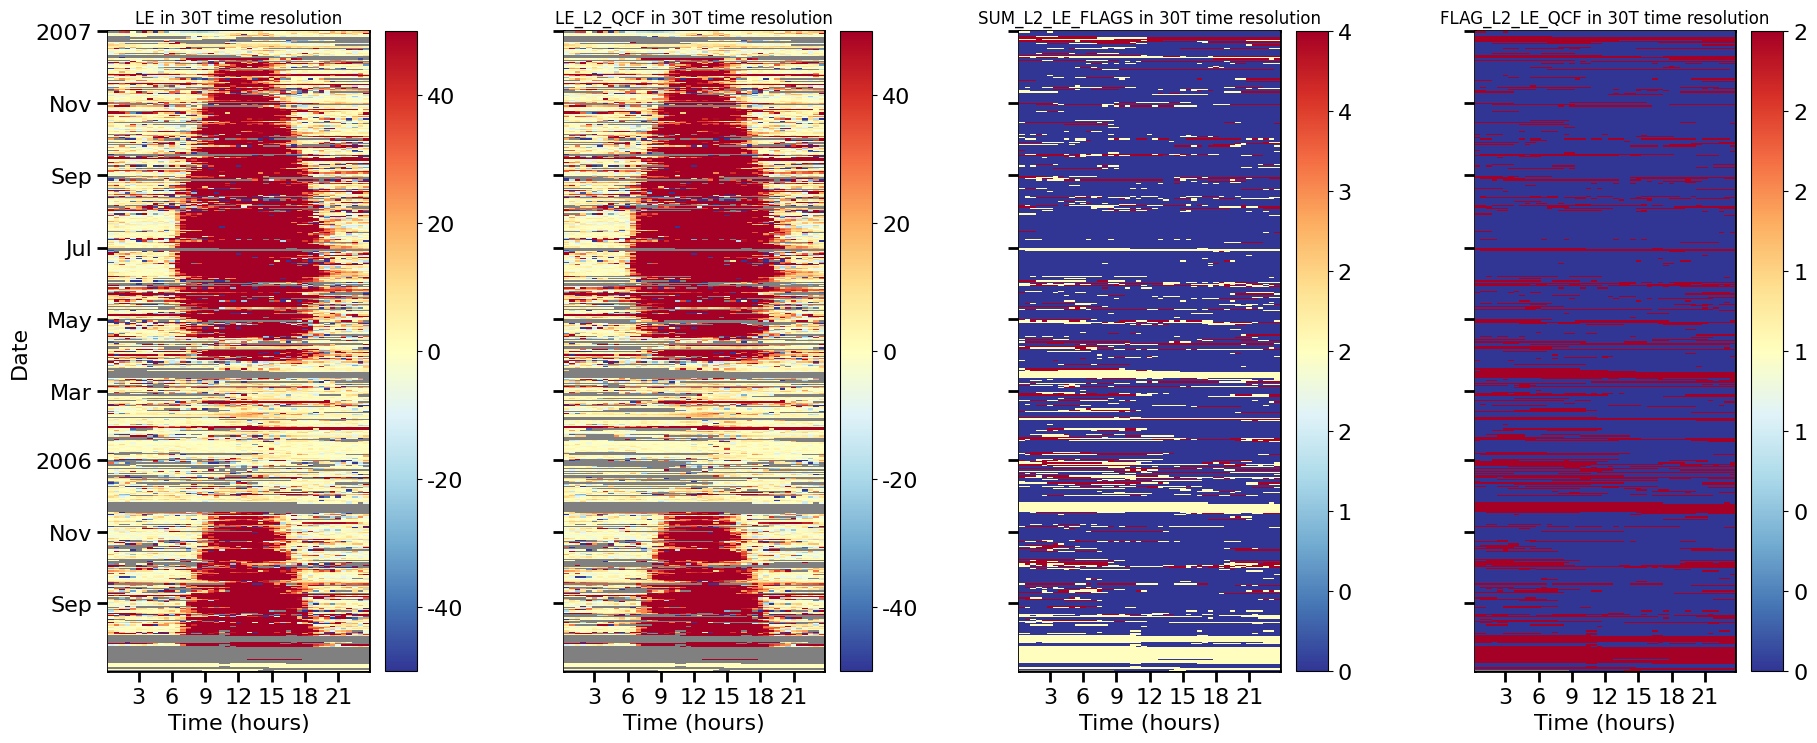

In [9]:
for f in FLUXCOLS:
    fxn.remove_low_signal_data(fluxcol=f,
                               signal_strength_col=SIGNAL_STRENGTH_COL,
                               method=SIGNAL_STRENGTH_METHOD,
                               threshold=SIGNAL_STRENGTH_THRESHOLD)

</br>

## Remove problematic time periods
               
Use `REMOVE_DATES` to specify the time period(s) for `VAR` that are removed from the dataset.

For example:

```python
REMOVE_DATES = ['2022-06-30 23:58:30',
                ['2022-06-05 00:00:30', '2022-06-07 14:30:00']]
```
will remove the record for `2022-06-30 23:58:30` and all records between
`2022-06-05 00:00:30` (inclusive) and `2022-06-07 14:30:00` (inclusive).

This also works when providing only the date, e.g.
```python
REMOVE_DATES = [['2006-05-01', '2006-07-18']] 
```
will remove all data points between `2006-05-01` (inclusive) and `2006-07-18` (inclusive).

In [11]:
VAR = ['FC', 'LE']
REMOVE_DATES = [['2009-08-20', '2010-03-09']]


Removing FC data points for the following date(s) and/or time range(s):
    REMOVING data for FC time range between ['2009-08-20', '2010-03-09'] (dates are inclusive)


[ManualRemoval]  ========================================
[ManualRemoval]  ManualRemoval
[ManualRemoval]  ========================================
Generating flag FLAG_FC_OUTLIER_MANUAL_TEST for variable FC ...
[ManualRemoval]  Done.
[ManualRemoval]  ________________________________________
 Done.

Removing LE data points for the following date(s) and/or time range(s):
    REMOVING data for LE time range between ['2009-08-20', '2010-03-09'] (dates are inclusive)


[ManualRemoval]  ========================================
[ManualRemoval]  ManualRemoval
[ManualRemoval]  ========================================
Generating flag FLAG_LE_OUTLIER_MANUAL_TEST for variable LE ...
[ManualRemoval]  Done.
[ManualRemoval]  ________________________________________
 Done.


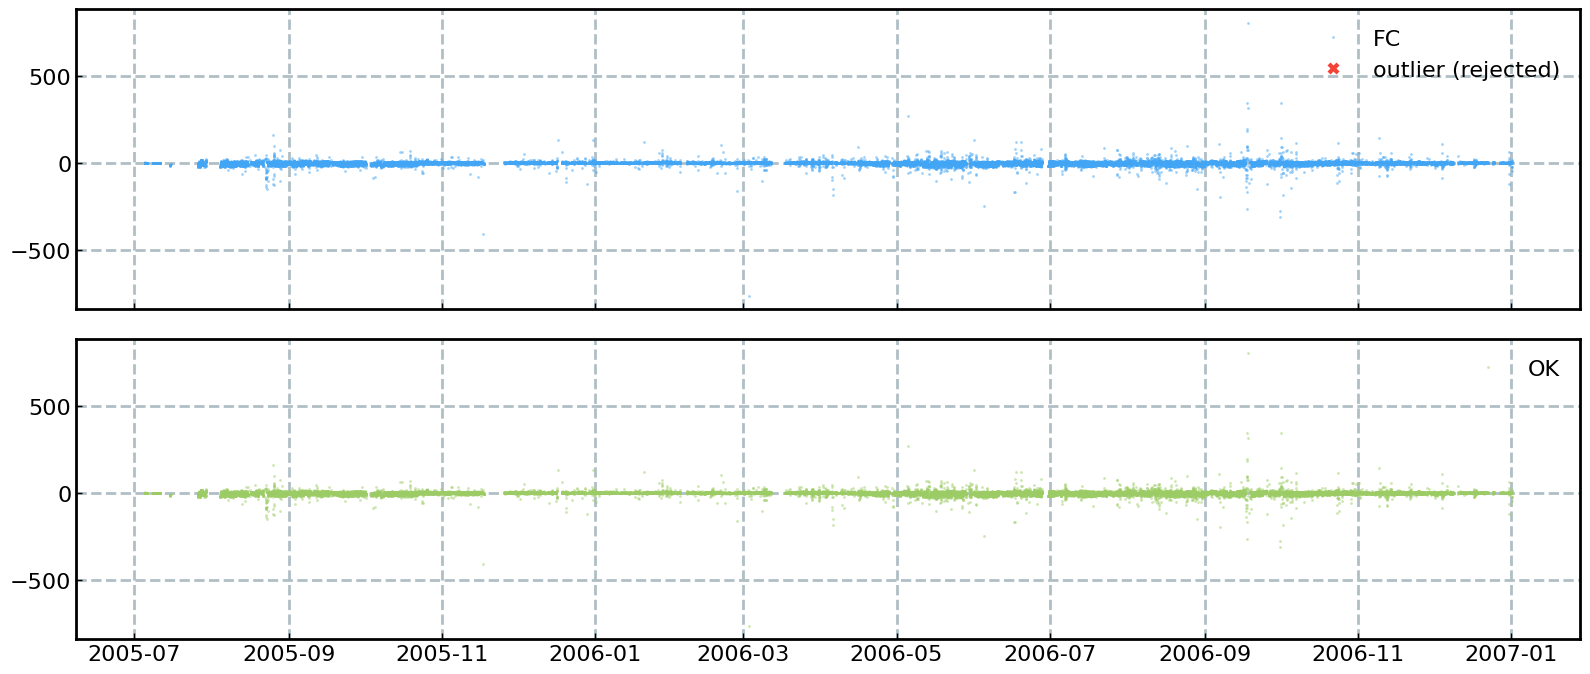

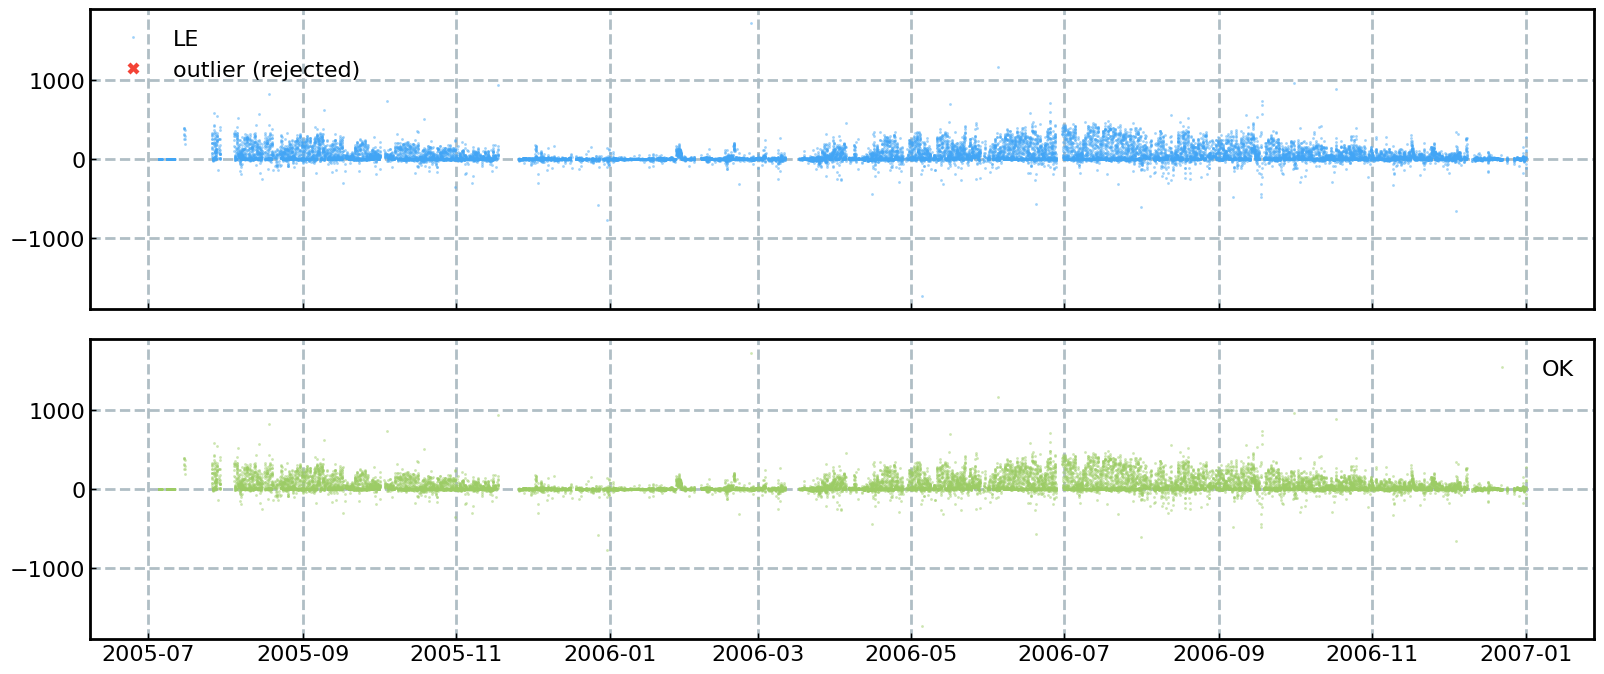

In [12]:
for v in VAR:
    fxn.remove_erroneous_data(var=v,
                              remove_dates=REMOVE_DATES,
                              showplot=True)

</br>

## Format data for FLUXNET

In [13]:
fxn.apply_fluxnet_format()


Assembling subset of variables ...
    Found: ['FC', 'FC_SSITC_TEST', 'SC_SINGLE', 'CO2', 'LE', 'LE_SSITC_TEST', 'SLE_SINGLE', 'H2O', 'H', 'H_SSITC_TEST', 'SH_SINGLE', 'USTAR', 'WD', 'WS', 'FETCH_70', 'FETCH_90', 'FETCH_MAX', 'SW_IN_1_1_1', 'TA_1_1_1', 'RH_1_1_1', 'PA_1_1_1', 'LW_IN_1_1_1', 'PPFD_IN_1_1_1']
    Not found: ['G_1_1_1', 'NETRAD_1_1_1', 'TS_1_1_1', 'P_1_1_1', 'SWC_1_1_1']

Setting all missing values to -9999 ...

The following variables are renamed to comply with FLUXNET variable codes:
    RENAMED --> SC_SINGLE was renamed to SC
    RENAMED --> SLE_SINGLE was renamed to SLE
    RENAMED --> SH_SINGLE was renamed to SH

The following variables have been renamed:
    RENAMED --> FC was renamed to FC_1_1_1
    RENAMED --> FC_SSITC_TEST was renamed to FC_SSITC_TEST_1_1_1
    RENAMED --> SC was renamed to SC_1_1_1
    RENAMED --> CO2 was renamed to CO2_1_1_1
    RENAMED --> LE was renamed to LE_1_1_1
    RENAMED --> LE_SSITC_TEST was renamed to LE_SSITC_TEST_1_1_1
    RENAMED 

</br>

## Save yearly `CSV` files

In [14]:
fxn.export_yearly_files()


Saving yearly CSV files ...
    --> Saved file F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2005_fluxes_meteo_20230823.csv.
    --> Saved file F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2006_fluxes_meteo_20230823.csv.
    --> Saved file F:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2007_fluxes_meteo_20230823.csv.


</br>

</br>

---

# **Check FLUXNET data**

- The merged file data from all files can be directly returned with `.get_data()`
- Note that the dataframe below does not show exactly how the data look like in the formatted data files, but how data were stored in `diive`, hence the timestamp index `TIMESTAMP_MIDDLE`
- The yearly files do not contain the timestamp index `TIMESTAMP_MIDDLE`

## Dataframe that was used to generate yearly files

In [15]:
data_fluxnet = fxn.get_data()
data_fluxnet

TIMESTAMP_START TIMESTAMP_END   FC_1_1_1  FC_SSITC_TEST_1_1_1     SC_1_1_1  CO2_1_1_1     LE_1_1_1  LE_SSITC_TEST_1_1_1    SLE_1_1_1   H2O_1_1_1    H_1_1_1  H_SSITC_TEST_1_1_1     SH_1_1_1  USTAR_1_1_1  WD_1_1_1  WS_1_1_1  FETCH_70_1_1_1  FETCH_90_1_1_1  FETCH_MAX_1_1_1  SW_IN_1_1_1   TA_1_1_1  RH_1_1_1  PA_1_1_1  LW_IN_1_1_1  PPFD_IN_1_1_1
TIMESTAMP_MIDDLE                                                                                                                                                                                                                                                                                                                                                          
2005-07-05 08:45:00    200507050830  200507050900  -1.452050                  1.0 -9999.000000    409.921     0.319460                  1.0 -9999.000000    12.54120   1.016460                 1.0 -9999.000000     0.004104   113.102  0.015840      -9999.0000      -9999.0000       -9999.0000   -9999.0000 -9999.0000 -9999.000   -9999.0    -9999.000    -9999.00000
2005-07-05 09:15:00    200507050900  200507050930   0.207326                  2.0     0.761637    424.090     0.067138                  2.0    -0.632032    12.27330   0.183814                 1.0    -1.257310     0.006308   125.169  0.018193      -9999.0000      -9999.0000       -9999.0000   -9999.0000 -9999.0000 -9999.000   -9999.0    -9999.000    -9999.00000
2005-07-05 09:45:00    200507050930  200507051000  -0.381113                  2.0    -1.901180    388.776    -0.108901                  2.0    -0.699526    11.97740   1.324690                 1.0    -0.668700     0.006090   131.188  0.015611      -9999.0000      -9999.0000       -9999.0000   -9999.0000 -9999.0000 -9999.000   -9999.0    -9999.000    -9999.00000
2005-07-05 10:15:00    200507051000  200507051030   0.154419                  1.0    -0.311197    382.996    -0.064659                  1.0    -0.486481    11.77160   0.082388                 1.0    -0.000813     0.007233   133.961  0.017642      -9999.0000      -9999.0000       -9999.0000   -9999.0000 -9999.0000 -9999.000   -9999.0    -9999.000    -9999.00000
2005-07-05 10:45:00    200507051030  200507051100  -0.240110                  2.0     2.388140    427.468    -0.040537                  2.0    -0.185020    11.69310  -0.096005                 1.0     1.230580     0.006679   108.806  0.013876      -9999.0000      -9999.0000       -9999.0000   -9999.0000 -9999.0000 -9999.000   -9999.0    -9999.000    -9999.00000
...                             ...           ...        ...                  ...          ...        ...          ...                  ...          ...         ...        ...                 ...          ...          ...       ...       ...             ...             ...              ...          ...        ...       ...       ...          ...            ...
2007-01-01 02:45:00    200701010230  200701010300  13.346800                  1.0     1.309090    390.354  -110.261000                  1.0     2.470450     8.83782 -18.202300                 0.0    -1.237990     0.202996   226.536  1.279840         45.9771         68.8821          25.1472      -2.3267     6.6608    81.603   -9999.0      336.844       -0.09865
2007-01-01 03:15:00    200701010300  200701010330 -50.087900                  0.0     2.876650    442.696   110.317000                  0.0     2.267630     9.75891 -29.281100                 0.0    -1.049940     0.155573   183.533  2.219580      -9999.0000      -9999.0000       -9999.0000      -5.9516     6.0057    94.217   -9999.0      340.491       -0.13029
2007-01-01 03:45:00    200701010330  200701010400 -22.916000                  2.0    -0.048678    441.808 -9999.000000              -9999.0  1189.370000 -9999.00000 -64.415200                 1.0     1.102200     0.218742   205.467  3.765690         38.5897         57.8145          21.1067      -4.6172     6.6954    88.665   -9999.0      342.508       -0.18383
2007-01-01 04:15:00    2007

</br>

## Overview of variables and some stats

In [16]:
# print(*data_fluxnet.columns, sep = "\n")
data_fluxnet.describe().T

count         mean          std      min          25%          50%          75%          max
FC_1_1_1             26153.0 -2124.987620  4088.715293  -9999.0   -18.272600    -2.105770     1.303420    804.47500
FC_SSITC_TEST_1_1_1  26153.0 -1039.343593  3052.601927  -9999.0     0.000000     0.000000     1.000000      2.00000
SC_1_1_1             26153.0 -1140.881056  3179.037186  -9999.0    -0.265552    -0.019057     0.078486     18.33610
CO2_1_1_1            26153.0  -691.599920  3171.662992  -9999.0   356.691000   369.164000   383.722000    893.51900
LE_1_1_1             26153.0 -2298.129117  4250.887976  -9999.0   -45.199700     2.055900    37.994100   1724.97000
LE_SSITC_TEST_1_1_1  26153.0 -1830.396245  3867.561895  -9999.0     0.000000     0.000000     1.000000      2.00000
SLE_1_1_1            26153.0  -771.753447  2846.708195 -18632.7    -0.668270    -0.055954     0.386089  32536.70000
H2O_1_1_1            26153.0 -1822.368532  3871.365065  -9999.0     4.021880     8.851770    13.262300     25.23510
H_1_1_1              26153.0  -761.371652  2657.930232  -9999.0   -12.335700    -1.346190     8.402140   2475.21000
H_SSITC_TEST_1_1_1   26153.0  -763.290751  2656.273513  -9999.0     0.000000     0.000000     1.000000      2.00000
SH_1_1_1             26153.0  -782.624134  2685.745464  -9999.0    -0.597934    -0.063109     0.375546      6.98135
USTAR_1_1_1          26153.0  -763.736532  2656.145213  -9999.0     0.064941     0.119325     0.209744      2.61332
WD_1_1_1             26153.0  -623.792708  2697.810552  -9999.0    51.668600   144.848000   213.253000    359.97000
WS_1_1_1             26153.0  -762.425432  2656.522526  -9999.0     0.729907     1.186200     1.914770     11.10600
FETCH_70_1_1_1       26153.0 -7294.978491  4458.540803  -9999.0 -9999.000000 -9999.000000    43.894900    156.24000
FETCH_90_1_1_1       26153.0 -7287.448373  4470.965319  -9999.0 -9999.000000 -9999.000000    65.762600    234.07700
FETCH_MAX_1_1_1      26153.0 -7301.826419  4447.244794  -9999.0 -9999.000000 -9999.000000    24.008400     85.45580
SW_IN_1_1_1          26153.0 -1452.260818  3677.474371  -9999.0    -5.159400    -1.984800   115.580000   1051.10000
TA_1_1_1             26153.0  -912.516125  2891.676386  -9999.0    -1.447500     7.410600    12.892000     28.61500
RH_1_1_1             26153.0  -844.032131  2910.170899  -9999.0    63.024000    82.479000    95.338000    100.01000
PA_1_1_1             26153.0 -9999.000000     0.000000  -9999.0 -9999.000000 -9999.000000 -9999.000000  -9999.00000
LW_IN_1_1_1          26153.0 -1296.749934  3731.362990  -9999.0   238.672000   296.164000   332.891000    409.40500
PPFD_IN_1_1_1        26153.0 -1333.930646  3736.287187  -9999.0    -0.174460    -0.127280   240.370000   2112.20000

</br>

## Plot some key variables
- Keep in mind that FLUXNET requires missing values as `-9999` when looking at the plots

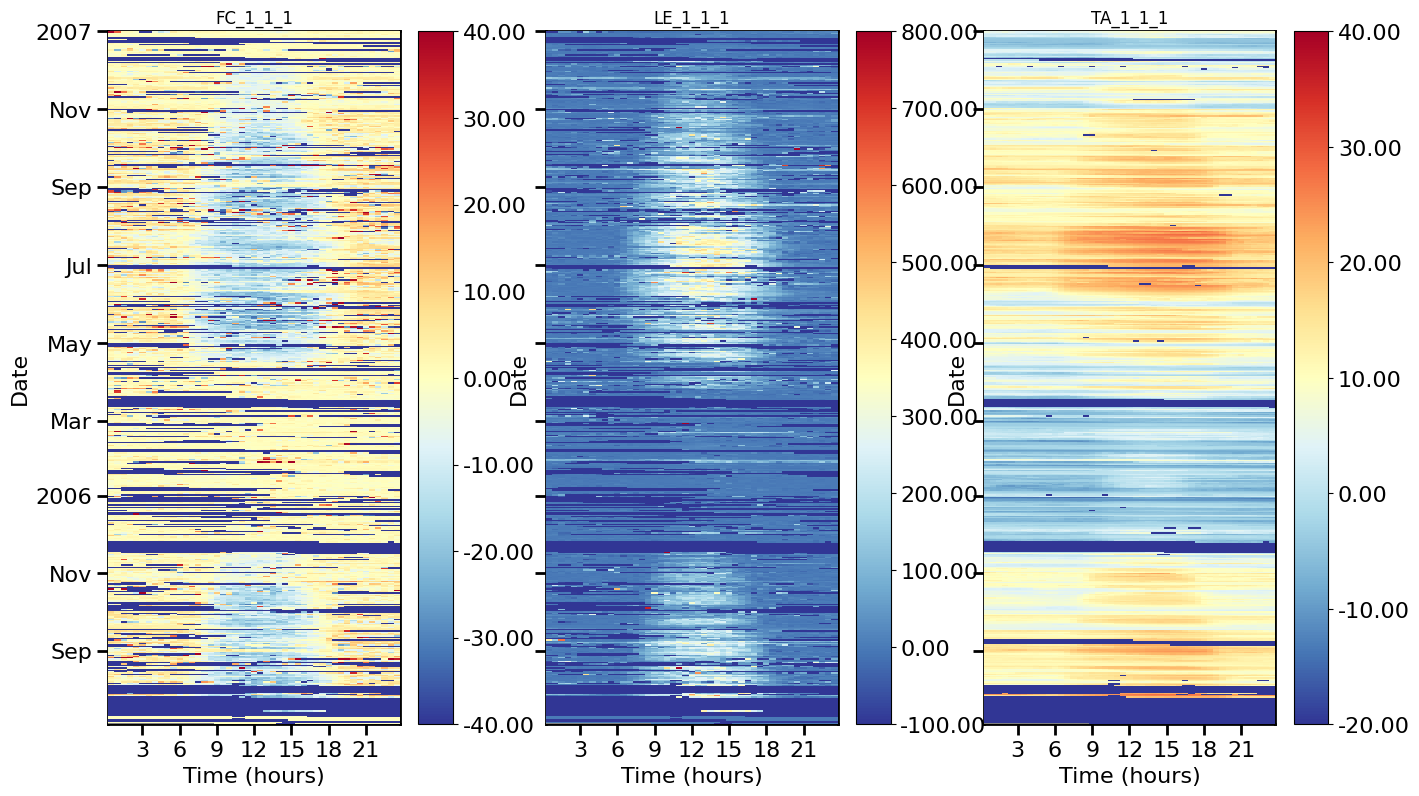

In [17]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
ax_fc = fig.add_subplot(gs[0, 0])
ax_le = fig.add_subplot(gs[0, 1])
ax_ta = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax_fc, series=data_fluxnet['FC_1_1_1'], vmin=-40, vmax=40).plot()
HeatmapDateTime(ax=ax_le, series=data_fluxnet['LE_1_1_1'], vmin=-100, vmax=800).plot()
HeatmapDateTime(ax=ax_ta, series=data_fluxnet['TA_1_1_1'], vmin=-20, vmax=40).plot()
ax_fc.set_title("FC_1_1_1", color='black')
ax_le.set_title("LE_1_1_1", color='black')
ax_ta.set_title("TA_1_1_1", color='black')
ax_le.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

</br>

## Plot all variables

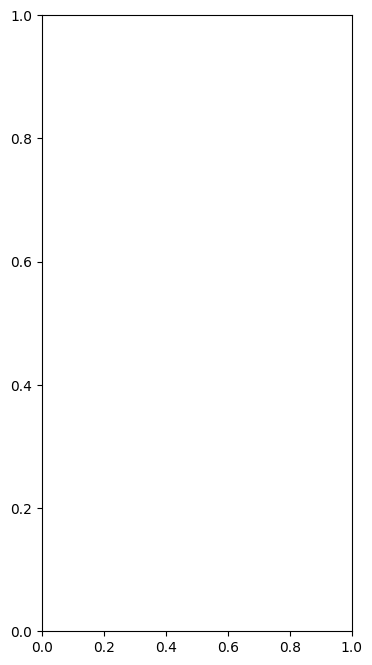

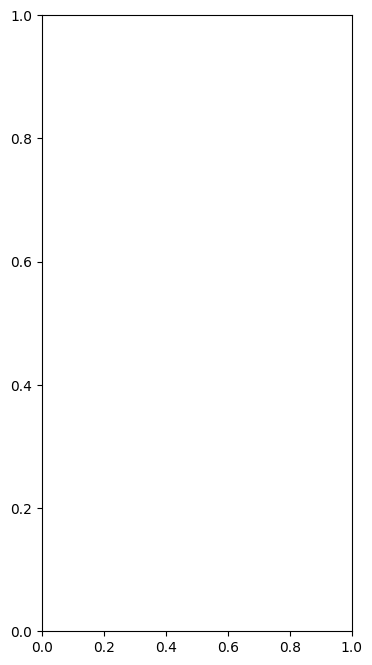

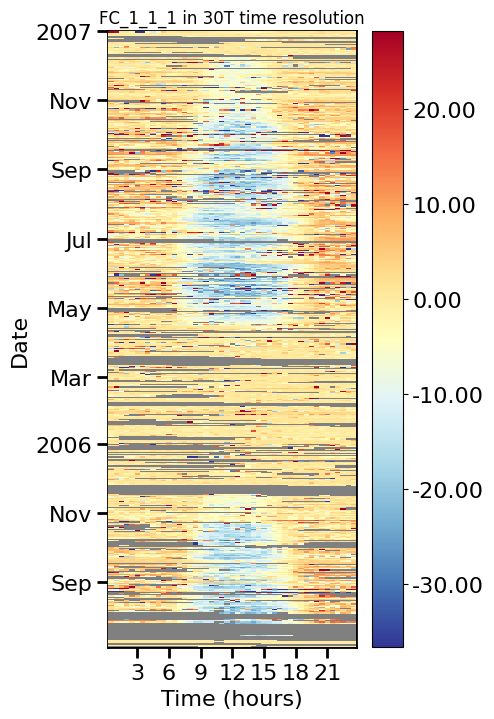

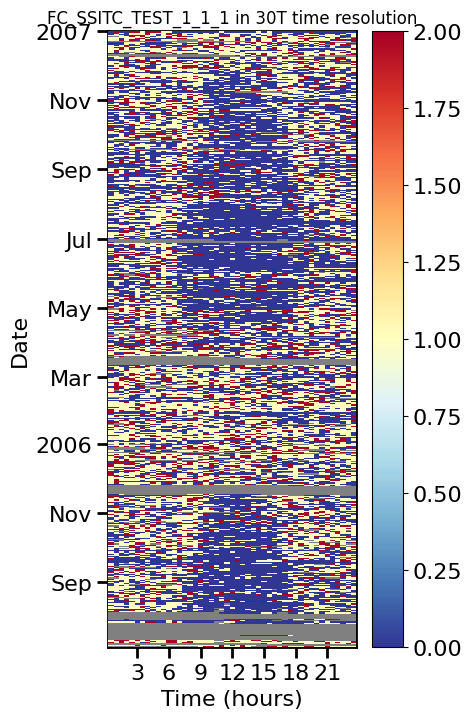

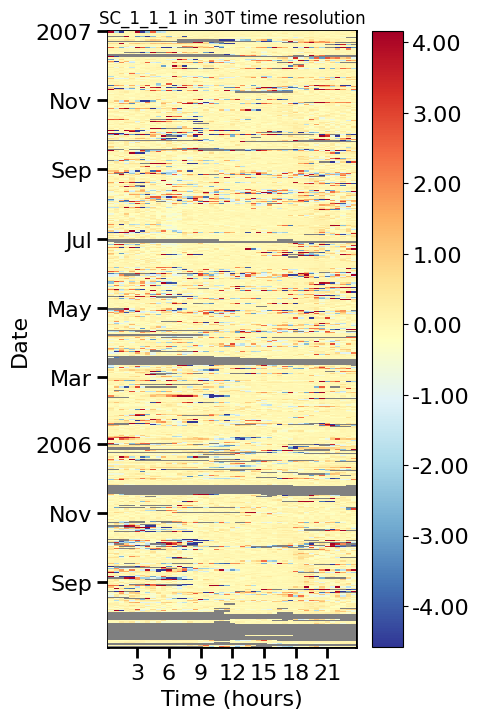

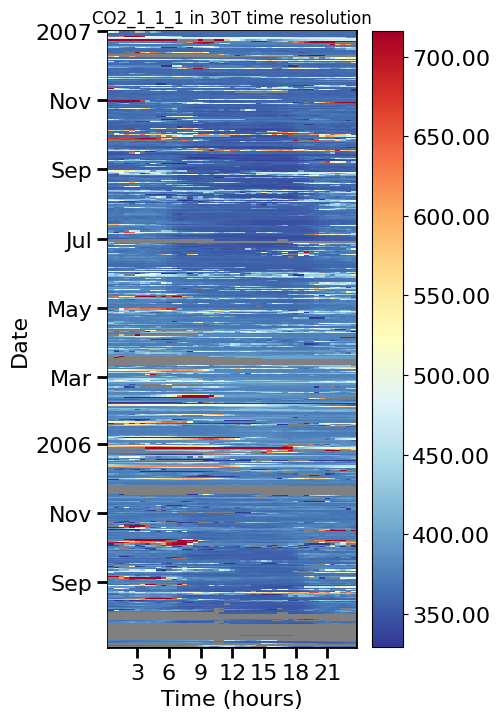

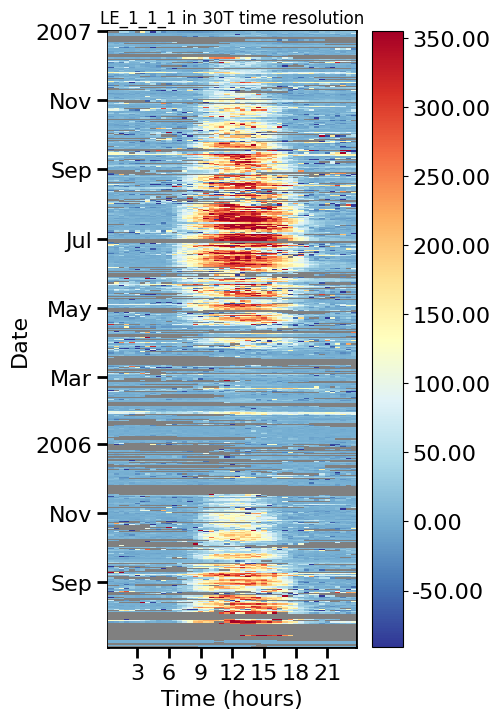

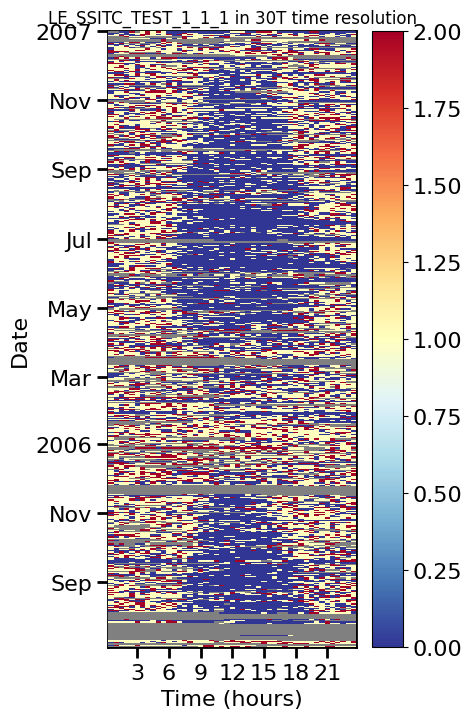

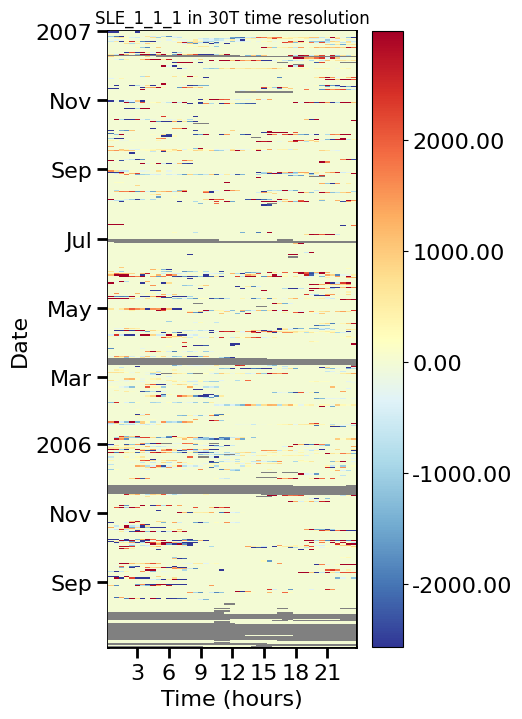

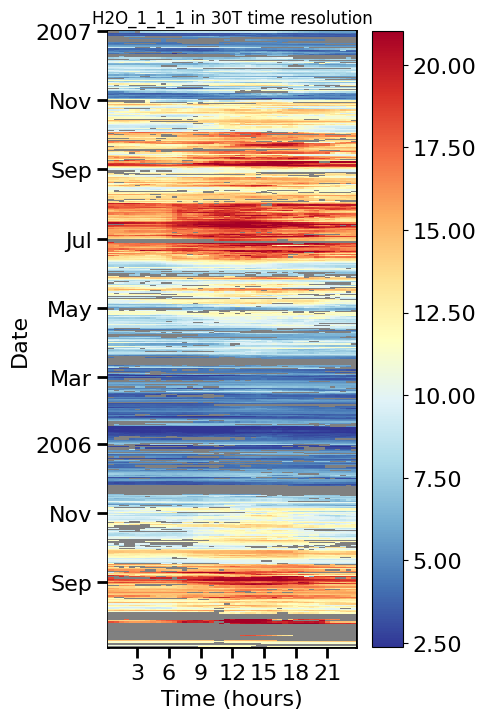

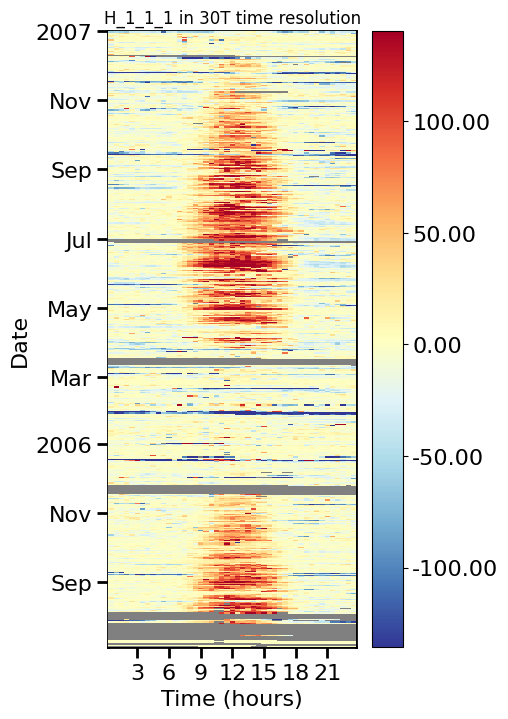

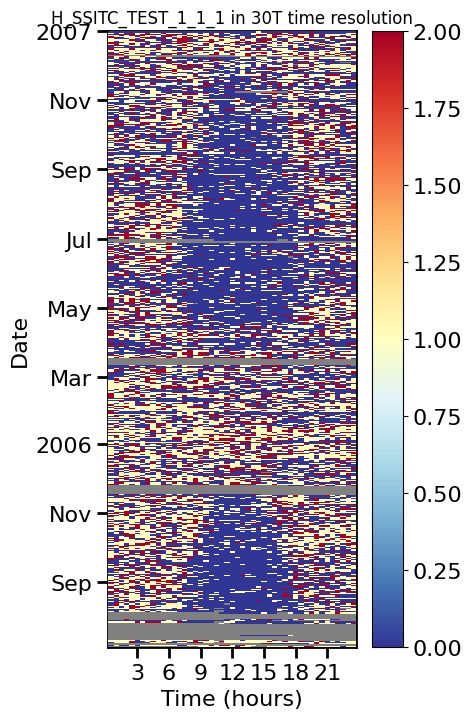

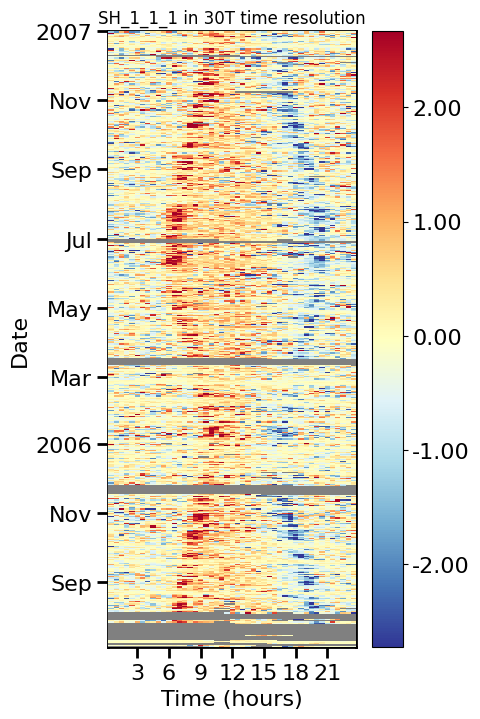

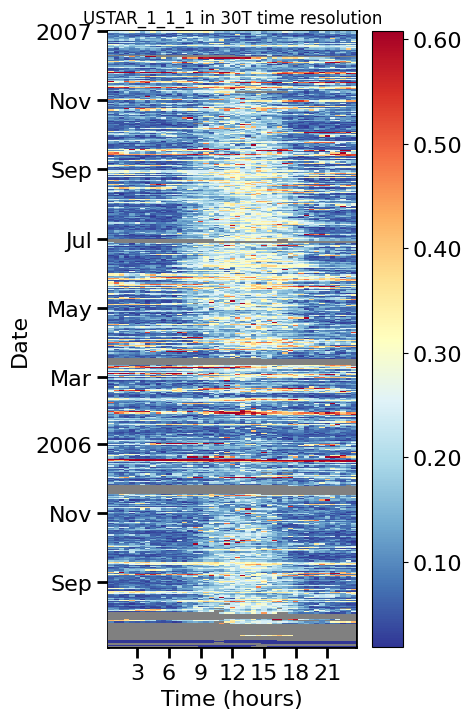

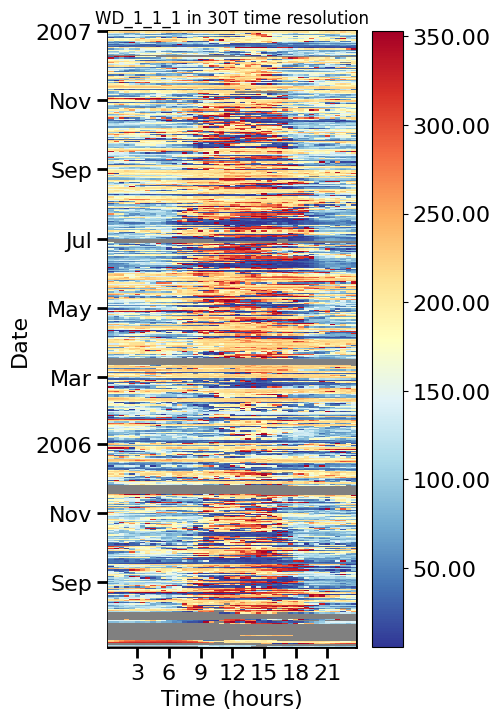

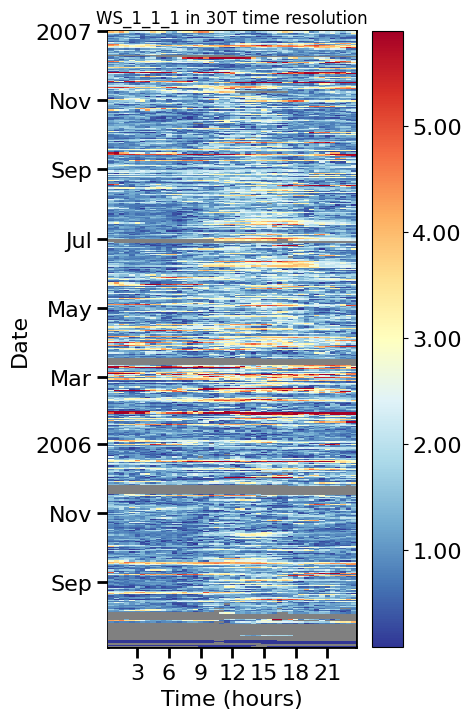

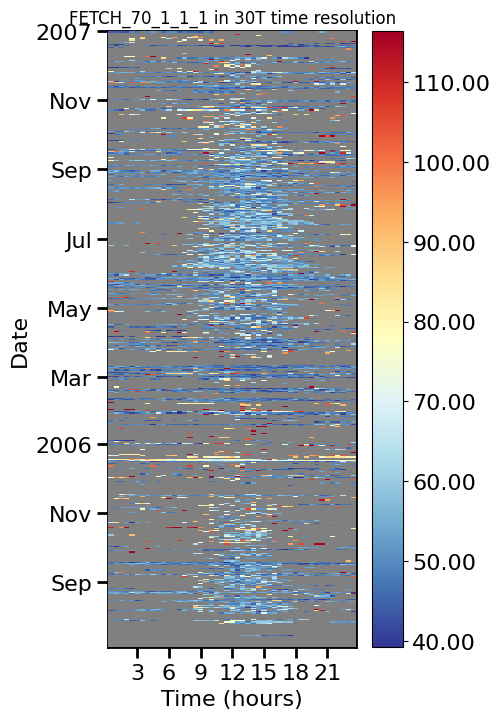

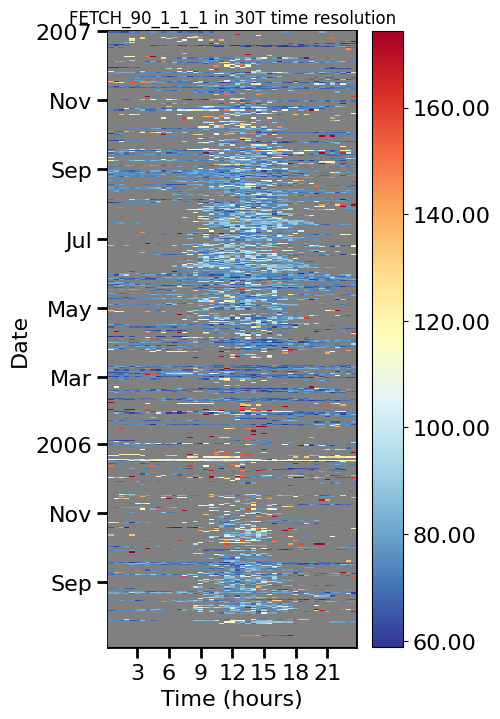

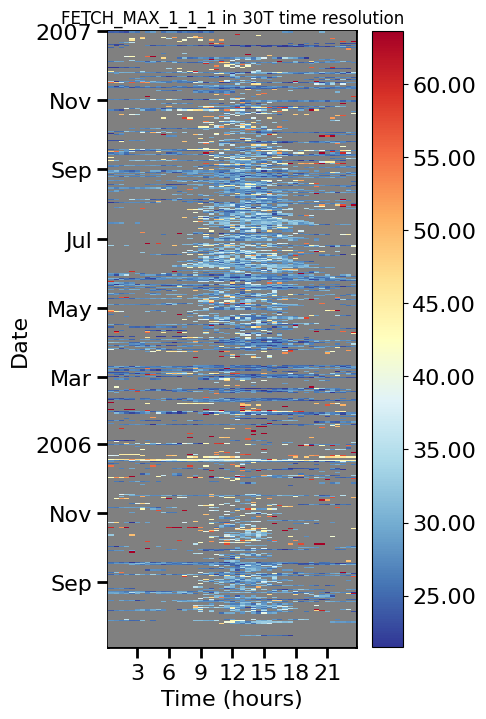

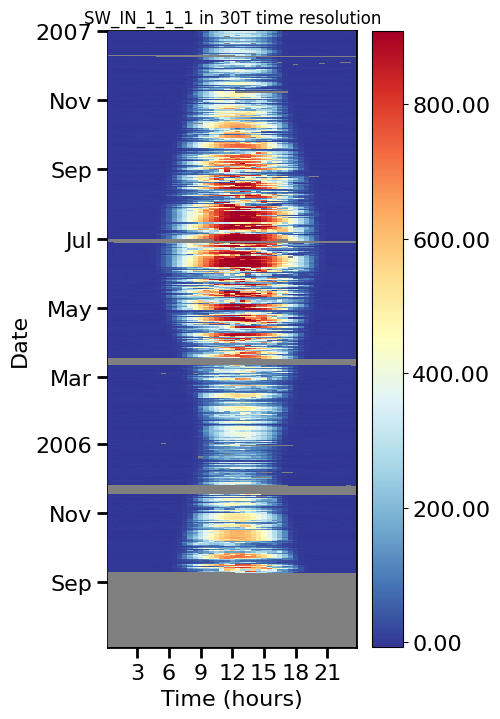

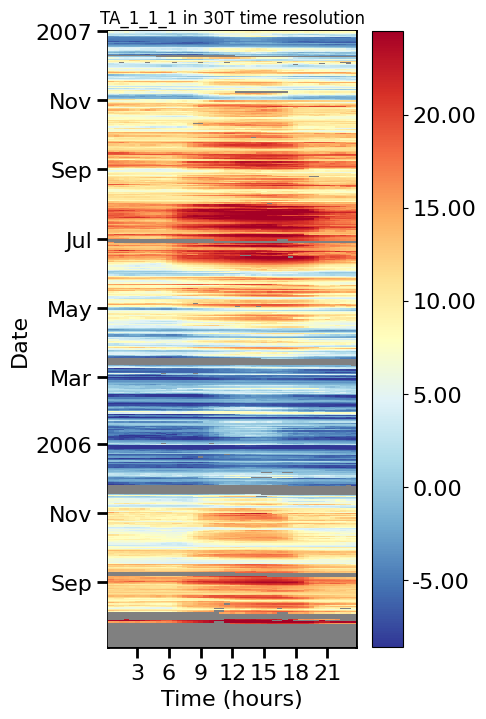

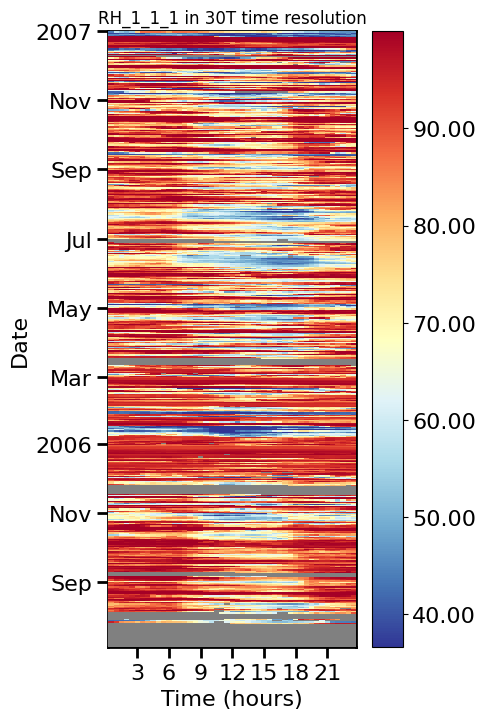

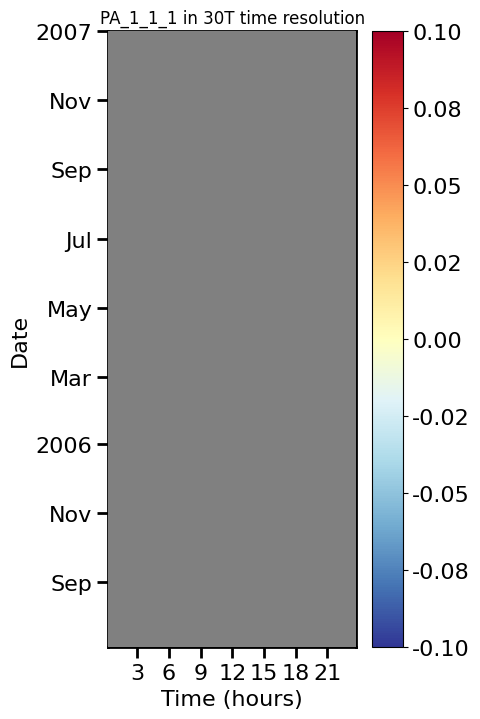

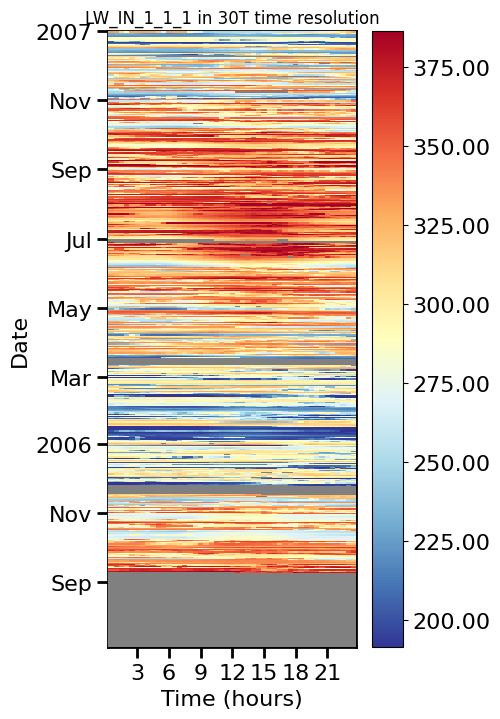

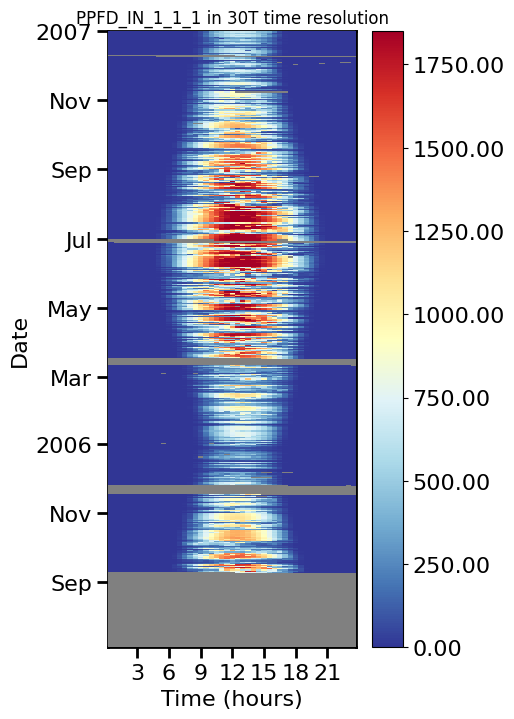

In [18]:
for col in data_fluxnet.columns:
    series = data_fluxnet[col].copy()
    series.replace(to_replace=-9999, value=np.nan, inplace=True)
    try:
        fig = plt.figure(facecolor='white', figsize=(4, 8))
        gs = gridspec.GridSpec(1, 1)  # rows, cols
        ax = fig.add_subplot(gs[0, 0])
        vmin = series.quantile(.01)
        vmax = series.quantile(.99)
        HeatmapDateTime(ax=ax, series=series, vmin=vmin, vmax=vmax).plot()
        ax_fc.set_title(col, color='black')
        fig.show()
    except TypeError:
        pass

</br>

</br>

---

# **End of notebook**

In [19]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2023-08-23 18:49:58
